In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
boston = pd.read_csv('Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [3]:
# extract all columns except Target column
boston_date = boston.drop(['Target'], axis=1)
boston_date.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


### 1978 Boston housing price data

- 1. AGE : rate of housing built before 1940
- 2. B : rate of black in population
- 3. RM : number of rooms per house
- 4. DIS : distance b/w job
- 5. INDUS : property of non commercial area
- 6. LSTAT : rate of lower class population 
- 7. NOX : concentration of nitrogen monoxide
- 8. PTRATIO : student/teacher ratio
- 9. RAD : distance to highway 
- 10. ZN : rate of living area that exceeds 25,000 ft^2
- 11. TAX : income tax
- 12. CHAS : located near Chales River yeas=1,  no=0

### Multiple regression model
- using crim, rm, lstat

In [4]:
x_data = boston[['CRIM', 'RM', 'LSTAT']]
target = boston[['Target']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [5]:
# add constant
x_data1 = sm.add_constant(x_data, has_constant='add')

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
# fit into model
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [7]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.01e-112
Time:                        17:41:37   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### multiple regression using crim, rm, lstat, b,tax,age, zn, nox, indus variables

In [8]:
## extract data from boston_data
x_data2 = boston[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [9]:
# add constant
x_data2_ = sm.add_constant(x_data2, has_constant='add')

In [10]:
# fit into model
multi_model2 = sm.OLS(target, x_data2_)
fitted_model2 = multi_model2.fit()

In [11]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          5.76e-111
Time:                        17:41:38   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# model for only 3 variables
fitted_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [13]:
# full model
fitted_model2.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

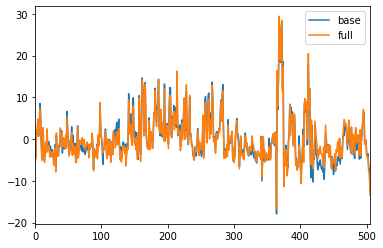

In [14]:
# compare base model and full model
import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label='base')
fitted_model2.resid.plot(label='full')
plt.legend()

### check multicollinearity

In [15]:
# correlation matrix
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


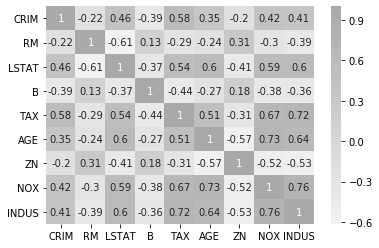

In [16]:
## visualization
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(x_data2.corr(), annot=True, cmap=cmap)
plt.show()

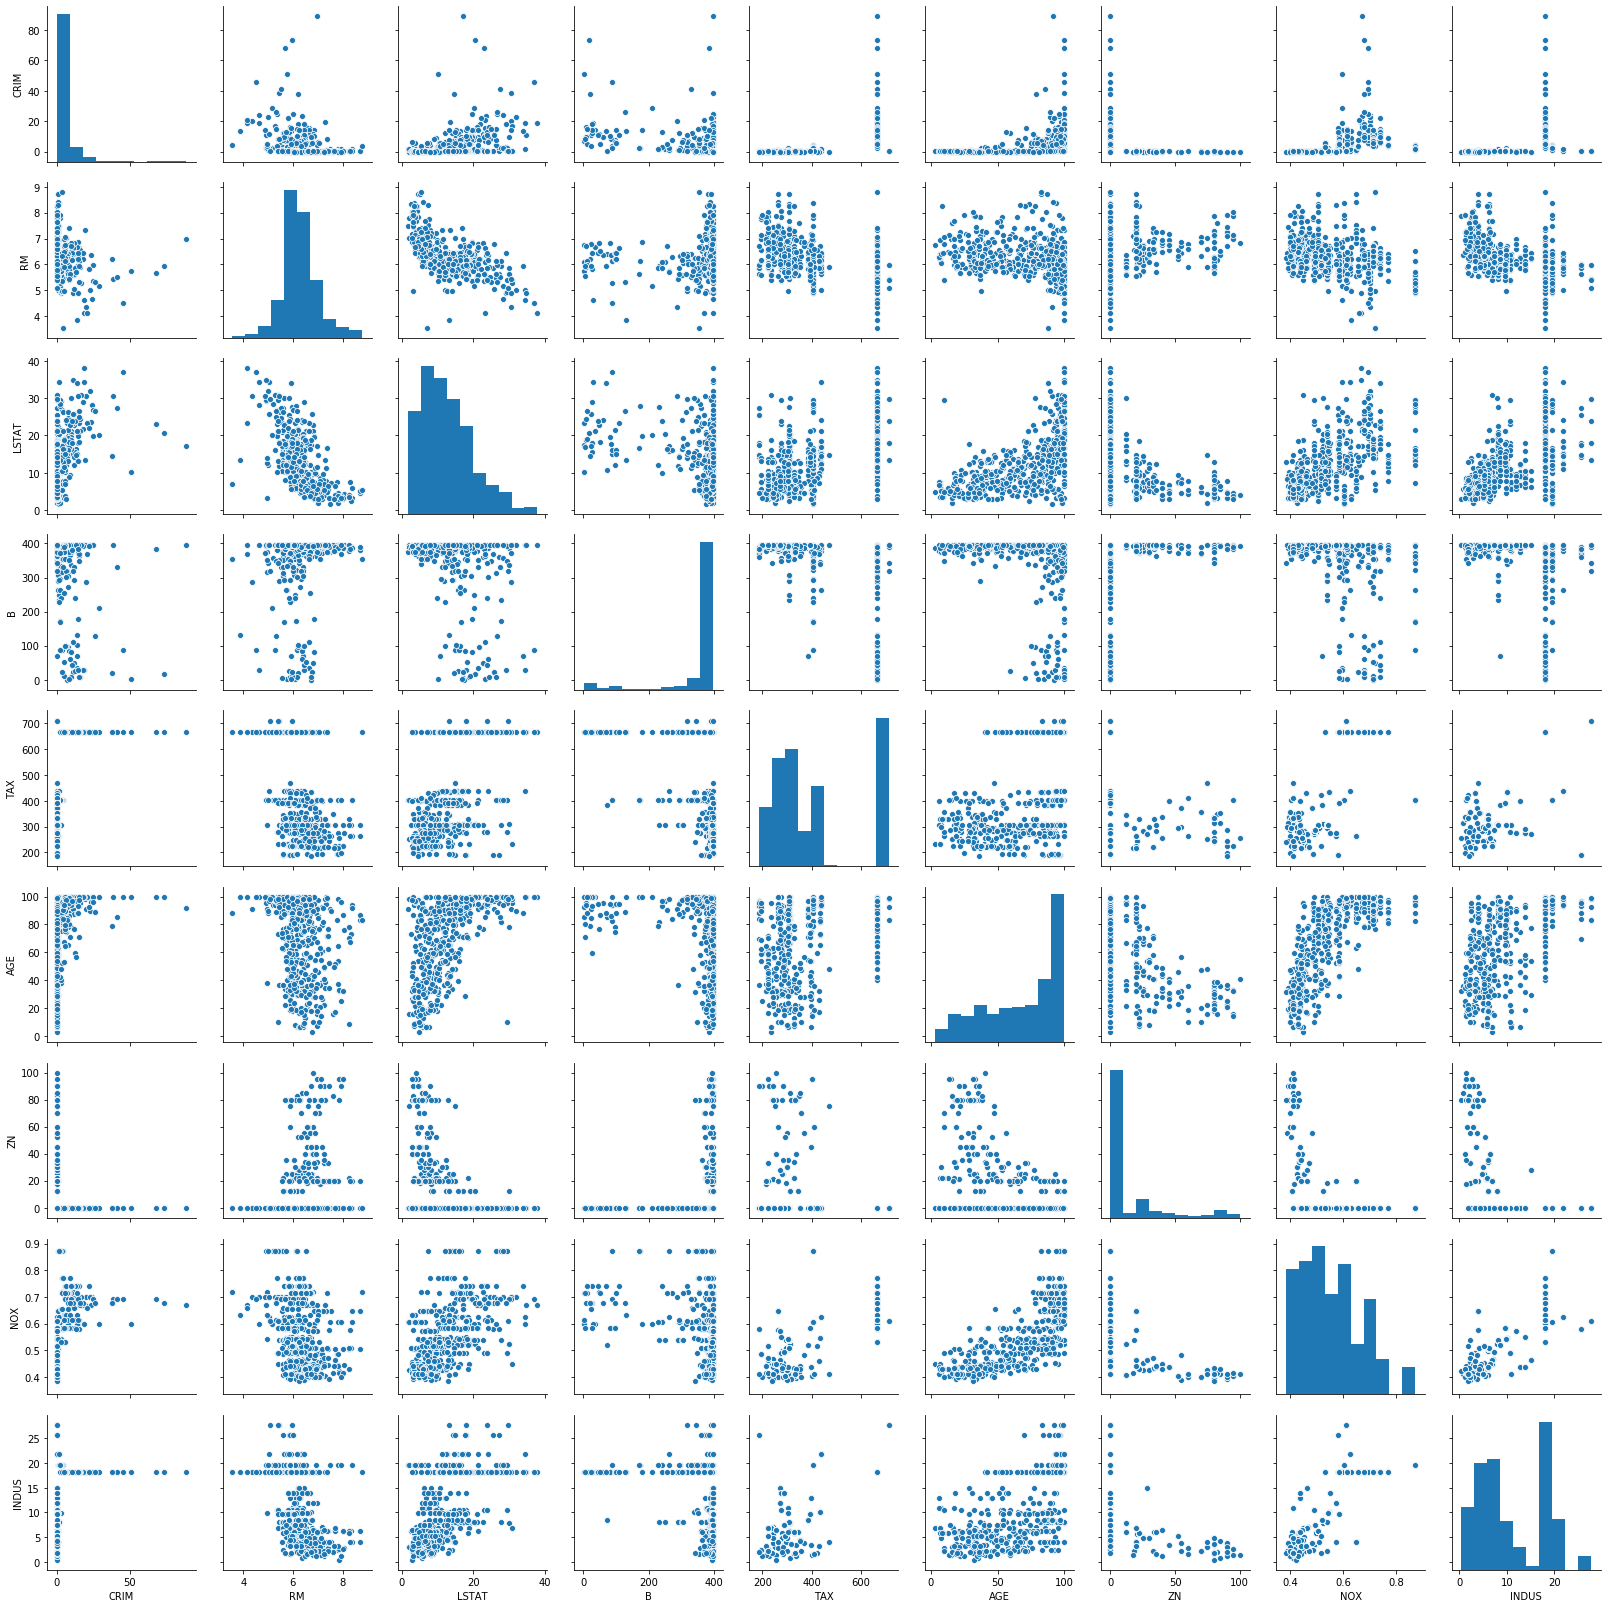

In [17]:
# visualization scatter plot for each variables
sns.pairplot(x_data2)
plt.show()

In [18]:
## Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns

In [19]:
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [20]:
# remove nox variable (x_data3)
vif = pd.DataFrame()

x_data3 = x_data2.drop('NOX', axis=1)
vif['VIF Factor'] = [variance_inflation_factor(
    x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns

In [21]:
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [22]:
# remove RM variable (x_data4)
vif = pd.DataFrame()

x_data4 = x_data3.drop('RM', axis=1)
vif['VIF Factor'] = [variance_inflation_factor(
    x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns

In [23]:
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [24]:
# fit regression model after removing nox variable (x_data3)
# fit regression model after removing nox, rm variables (x_data4)
x_data3_ = sm.add_constant(x_data3, has_constant='add')
x_data4_ = sm.add_constant(x_data4, has_constant='add')

model_vif = sm.OLS(target, x_data3_)
fitted_model_vif = model_vif.fit()
model_vif2 = sm.OLS(target, x_data4_)
fitted_model_vif2 = model_vif2.fit()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
# compare the result using .summary()
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          7.62e-112
Time:                        17:42:57   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
fitted_model_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           5.53e-89
Time:                        17:42:57   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split training/validation data

In [29]:
from sklearn.model_selection import train_test_split
X = x_data2_
y = target
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [33]:
#fit regression model
train_x.head()
# x_datax_ = sm.add_constant(train_x, has_constant='add')

fit_1 = sm.OLS(train_y, train_x)
fit_1 = fit_1.fit()
# fitted_model_vif_x = model_vif.fit()

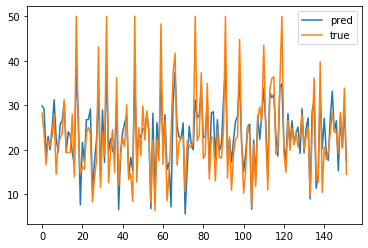

In [35]:
# compare validation data and expected values and real data
plt.plot(np.array(fit_1.predict(test_x)), label='pred')
plt.plot(np.array(test_y), label='true')
plt.legend()
plt.show()

In [36]:
# x_data3 and x_data4 split validate training data
X = x_data3_
y = target
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=1)
# print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

In [37]:
X = x_data4_
y = target
train_x3, test_x3, train_y3, test_y3 = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=1)

### manually check the tested results

In [38]:
test_y.head()

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [39]:
test_y2.head()

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [40]:
test_y2.head()

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [41]:
# x_data3, x_data4 fit regression model(fit2, fit3)
fit_2 = sm.OLS(train_y2, train_x2)
fit_2 = fit_2.fit()

fit_3 = sm.OLS(train_y3, train_x3)
fit_3 = fit_3.fit()

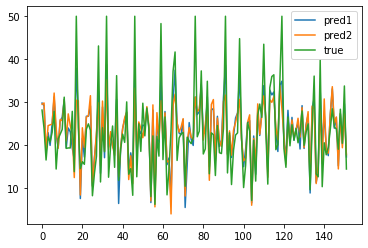

In [42]:
# compare validation data and expected values and real data
plt.plot(np.array(fit_2.predict(test_x2)), label='pred1')
plt.plot(np.array(fit_3.predict(test_x3)), label='pred2')
plt.plot(np.array(test_y2), label='true')
plt.legend()
plt.show()

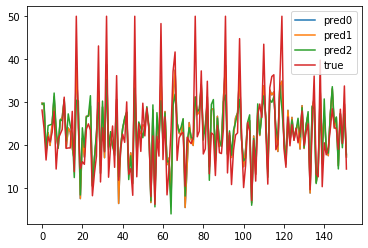

In [43]:
# add full model comparison
plt.plot(np.array(fit_1.predict(test_x)), label='pred0')
plt.plot(np.array(fit_2.predict(test_x2)), label='pred1')
plt.plot(np.array(fit_3.predict(test_x3)), label='pred2')
plt.plot(np.array(test_y2), label='true')
plt.legend()
plt.show()

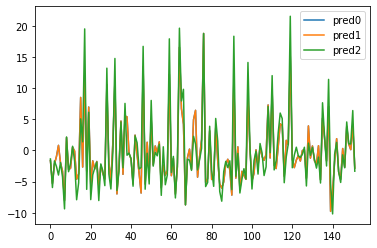

In [44]:
plt.plot(np.array(test_y2['Target']-fit_1.predict(test_x)), label='pred0')
plt.plot(np.array(test_y2['Target']-fit_2.predict(test_x2)), label='pred1')
plt.plot(np.array(test_y2['Target']-fit_3.predict(test_x3)), label='pred2')
plt.legend()
plt.show()

### performance comparison using MSE


In [45]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y_true=test_y['Target'], y_pred=fit_1.predict(test_x))

26.148631468819797

In [48]:
mean_squared_error(y_true=test_y['Target'], y_pred=fit_2.predict(test_x2))

26.140062609846467

In [49]:
mean_squared_error(y_true=test_y['Target'], y_pred=fit_3.predict(test_x3))

38.78845317912826